In [2]:
import pandas as pd
import math
import numpy as np

### read the csv and total no. of children

In [46]:
scans = pd.read_csv('scans.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 2106


,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


### getting the total of gender

female    1058
male      1048
Name: sex, dtype: int64


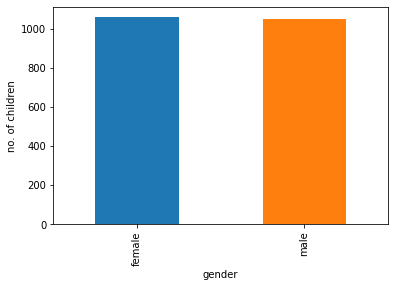

In [47]:
ax = scans['sex'].value_counts().plot(kind='bar')
ax.set_xlabel('gender')
ax.set_ylabel('no. of children')
print(scans['sex'].value_counts())

In [5]:
## function to convert the days into age
def age(row):
    in_years= row['age']/365
    return round(in_years)

In [48]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(age,axis=1)
scans.head()

,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


### plotting the bar graph no. of children against age

4    705
3    606
5    370
2    346
1     63
0     14
6      2
Name: Years, dtype: int64


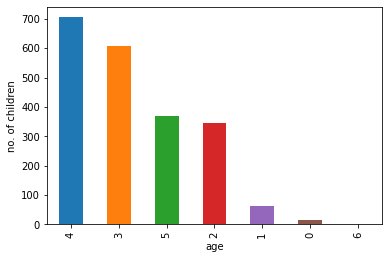

In [49]:
age_ax = scans['Years'].value_counts().plot(kind='bar')
age_ax.set_xlabel('age')
age_ax.set_ylabel('no. of children')
print(scans['Years'].value_counts())

### getting the distribition based on gender

In [50]:
male = scans[scans['sex']=='male']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    365
3    282
5    189
2    176
1     29
0      7
Name: Years, dtype: int64


In [51]:
female = scans[scans['sex']=='female']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
4    340
3    324
5    181
2    170
1     34
0      7
6      2
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [53]:
artifacts = pd.read_csv('artifacts.csv')
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [54]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [55]:
print("Total no. of pointclouds:",len(artifacts ))

Total no. of pointclouds: 50149


101.0    21033
100.0    14843
102.0    14246
201.0       19
202.0        8
Name: key, dtype: int64


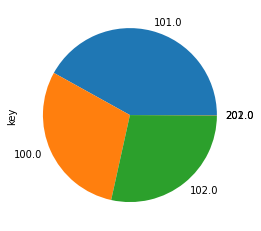

In [56]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [57]:
## fucntion to extract just the qrcode from them path
def extractqrcode(row):
    complete_path = row['storage_path']
    path = complete_path.split('/')
    qrcode = path[1]
    return qrcode

In [58]:
artifacts['qrcode'] = artifacts.apply(extractqrcode,axis=1)
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [59]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584999865-01t0n240ra_1591629837700_100_008...,lD0OAaaZ0pcD0zRk_artifact-scan-pcd_15700608000...,qrcode/1584999865-01t0n240ra/measure/159162983...,86.5,12.45,100.0,good,1584999865-01t0n240ra
2,pc_1583942091-02migjdla1_1591470015961_100_000...,ZPFkcYGhq15raY3J_artifact-scan-pcd_15736032000...,qrcode/1583942091-02migjdla1/measure/159147001...,71.6,8.10,100.0,good,1583942091-02migjdla1
3,pc_1585011777-031jov4jpw_1591815240163_100_000...,D7tiN7CtUEM9WoRx_artifact-scan-pcd_15712704000...,qrcode/1585011777-031jov4jpw/measure/159181524...,78.5,11.75,100.0,good,1585011777-031jov4jpw
4,pc_1585003039-032hniw434_1591707933084_102_000...,8SMAKMkY79LovcBU_artifact-scan-pcd_15708384000...,qrcode/1585003039-032hniw434/measure/159170793...,108.1,15.50,102.0,good,1585003039-032hniw434


In [60]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 2106


Text(0, 0.5, 'height')

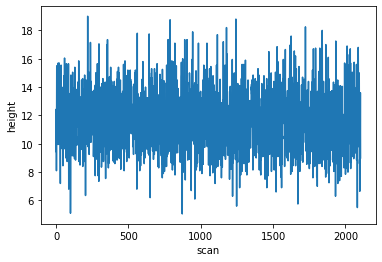

In [61]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

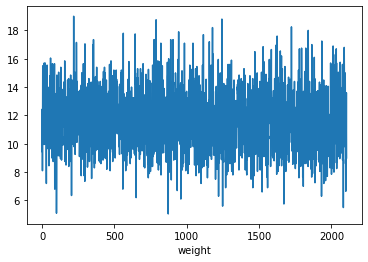

In [62]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [63]:
distribution_data = pd.merge(scans,getheight[['height','weight','qrcode']],on='qrcode', how='left')
distribution_data.head()

,qrcode,person_id,age,sex,Years,height,weight
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4,85.7,9.45
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4,86.5,12.45
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3,71.6,8.10
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3,78.5,11.75
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4,108.1,15.50


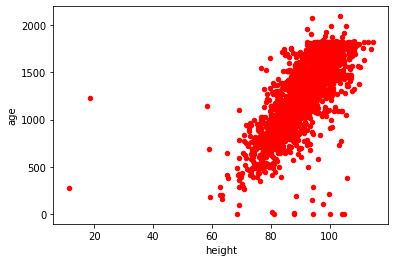

In [64]:
#distribution of height against age
heightvsage = distribution_data.plot.scatter(x='height',
                      y='age',
                      c='red')

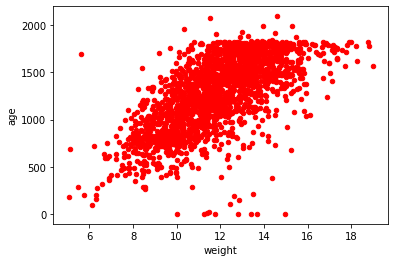

In [65]:
#distribution of weight against age
weightvsage = distribution_data.plot.scatter(x='weight',
                      y='age',
                      c='red')

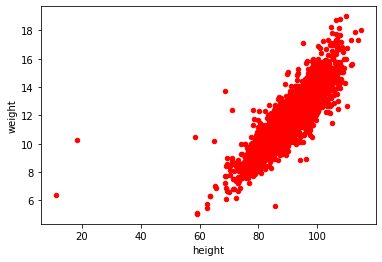

In [66]:
## distribution of height against weight
weightvsheight = distribution_data.plot.scatter(x='height',
                      y='weight',
                      c='red')

## Check on the amount of artifacts and scans from the dataset

In [67]:
from azureml.core import Workspace, Dataset
ws = Workspace.from_config()
dataset = Dataset.get_by_name(ws, name='anon-pcd-50k')
type(dataset)

azureml.data.file_dataset.FileDataset

In [68]:
mount_context = dataset.mount()
mount_context.start()  # this will mount the file streams
print(mount_context.mount_point)

/tmp/tmpu7rmyypu


In [69]:
import glob2
dataset = glob2.glob('/tmp/tmpu7rmyypu/qrcode/**/*.pcd')
len(dataset)

50149

In [70]:
print("Total no. of pointclouds in csv:",len(artifacts))
print("Total no. of pointclouds in dataset:",len(dataset))

Total no. of pointclouds in csv: 50149
Total no. of pointclouds in dataset: 50149


In [75]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data,columns=['qrcodes'])

In [83]:
print("Total no. of scans in dataset:",len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      

Total no. of scans in dataset: 2106
Total no. of scans in csv: 2106
